In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'/kaggle/input/details/data.xlsx')
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [65]:
data.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


### Univariate Analysis

###     -> Numerical

In [4]:
numerical = data.select_dtypes(include='number')

In [5]:
numerical.head()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,84.3,2007,95.8,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,85.4,2007,85.0,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,85.0,2010,68.2,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,85.6,2007,83.6,6920,1,74.64,6920,1,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,78.0,2008,76.8,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

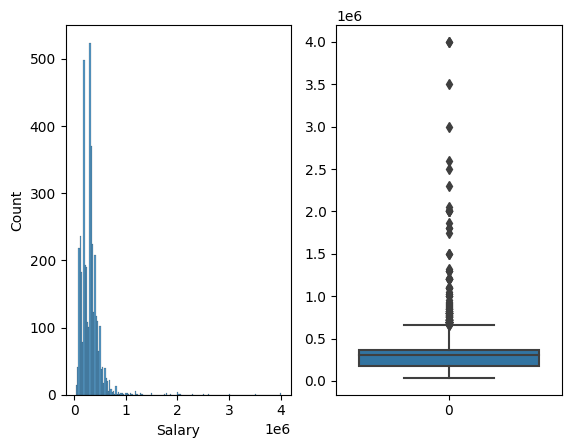

In [6]:
plt.subplot(1,2,1)
sns.histplot(numerical['Salary'])
plt.subplot(1,2,2)
sns.boxplot(numerical['Salary'])

#### There are outliers ie) they either get more salary or less salary,average salary is 5 lakhs

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

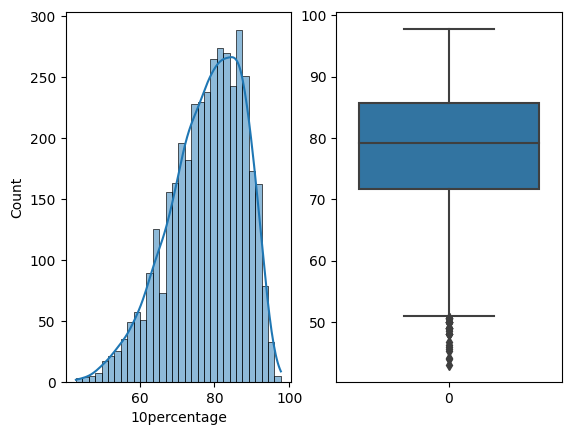

In [7]:
plt.subplot(1,2,1)
sns.histplot(numerical['10percentage'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(numerical['10percentage'])

#### Observation : left skewed,average mark was around 80

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

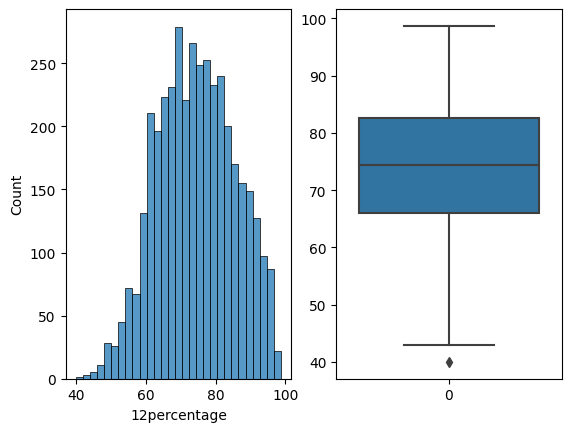

In [8]:
plt.subplot(1,2,1)
sns.histplot(numerical['12percentage'])
plt.subplot(1,2,2)
sns.boxplot(numerical['12percentage'])

#### Observation : average 12 percentage is ariund 75

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

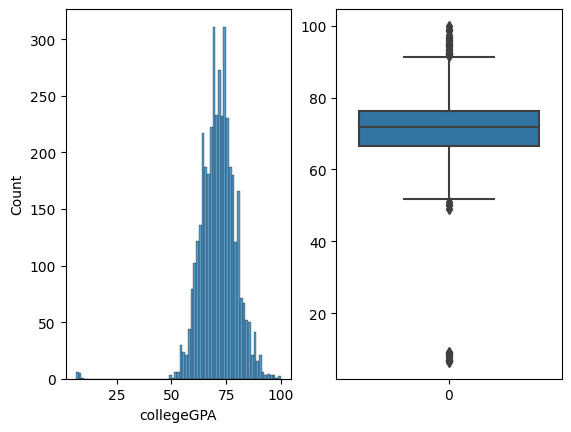

In [9]:
plt.subplot(1,2,1)
sns.histplot(numerical['collegeGPA'])
plt.subplot(1,2,2)
sns.boxplot(numerical['collegeGPA'])

#### Observation : there are people who get around 90% marks and people who get less than 20% but apparently mean was 70%

In [10]:
numerical['CollegeTier'] = numerical['CollegeTier'].astype('category')
numerical['CollegeTier'].value_counts()

CollegeTier
2    3701
1     297
Name: count, dtype: int64

#### Observation : Most of the people are from tier 2 colleges

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='CollegeTier', ylabel='count'>

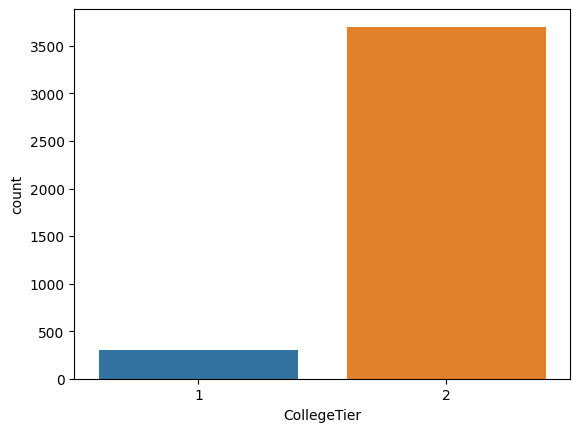

In [11]:
sns.countplot(x='CollegeTier',data=numerical)

#### Most of the students are from Tier 2

In [12]:
numerical['12graduation'] = numerical['12graduation'].astype('category')

<Axes: xlabel='12graduation', ylabel='count'>

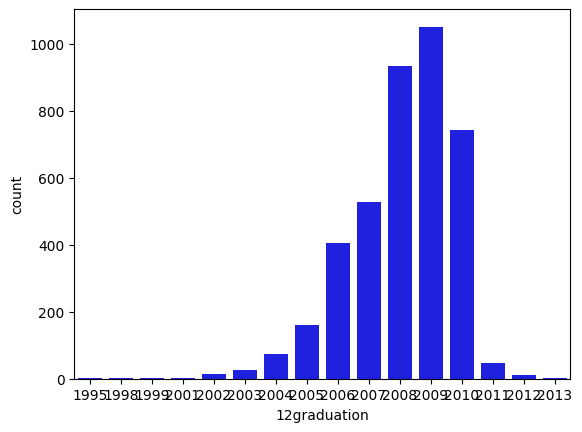

In [13]:
sns.countplot(x='12graduation',data = numerical,color='blue')

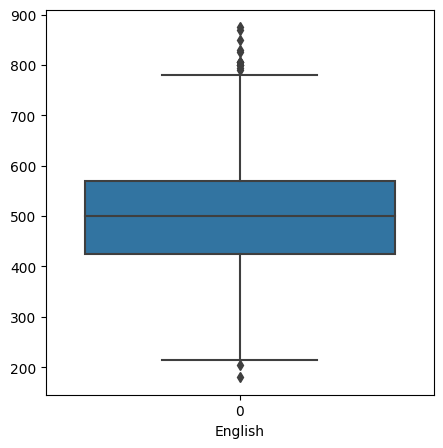

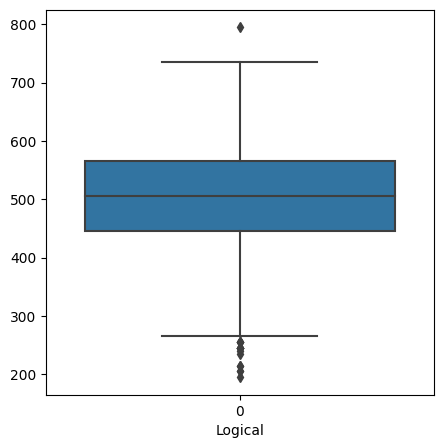

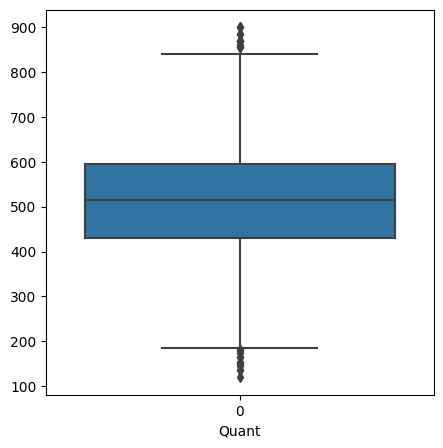

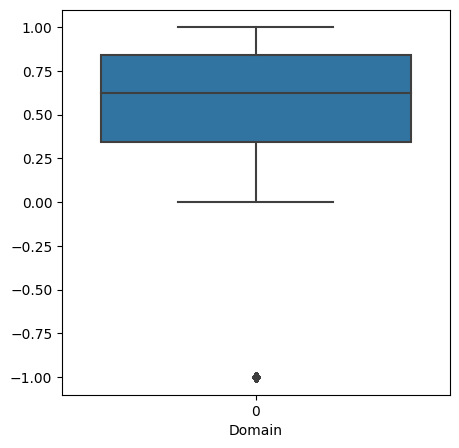

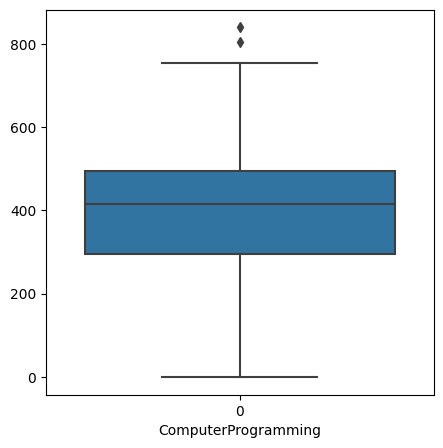

In [14]:
cols = ['English','Logical','Quant','Domain','ComputerProgramming']
for i in cols:
    plt.figure(figsize=(5,5))
    plt.xlabel(i)
    sns.boxplot(numerical[i])

In [15]:
cate = data.select_dtypes(include=object)

In [16]:
for i in cate.columns:
    cate[i] = cate[i].astype('category')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Gender', ylabel='count'>

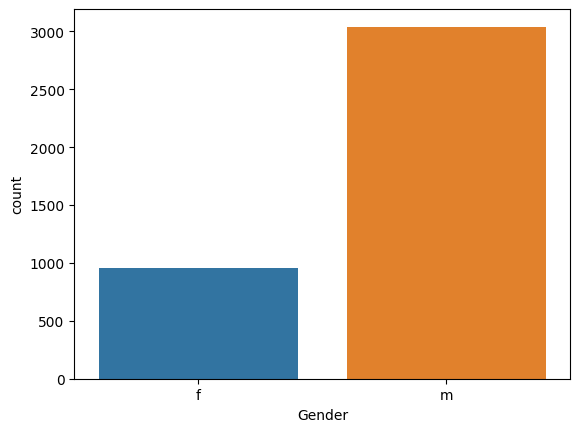

In [17]:
sns.countplot(x='Gender',data=cate)

#### Most of the Students are male

<Axes: xlabel='count', ylabel='JobCity'>

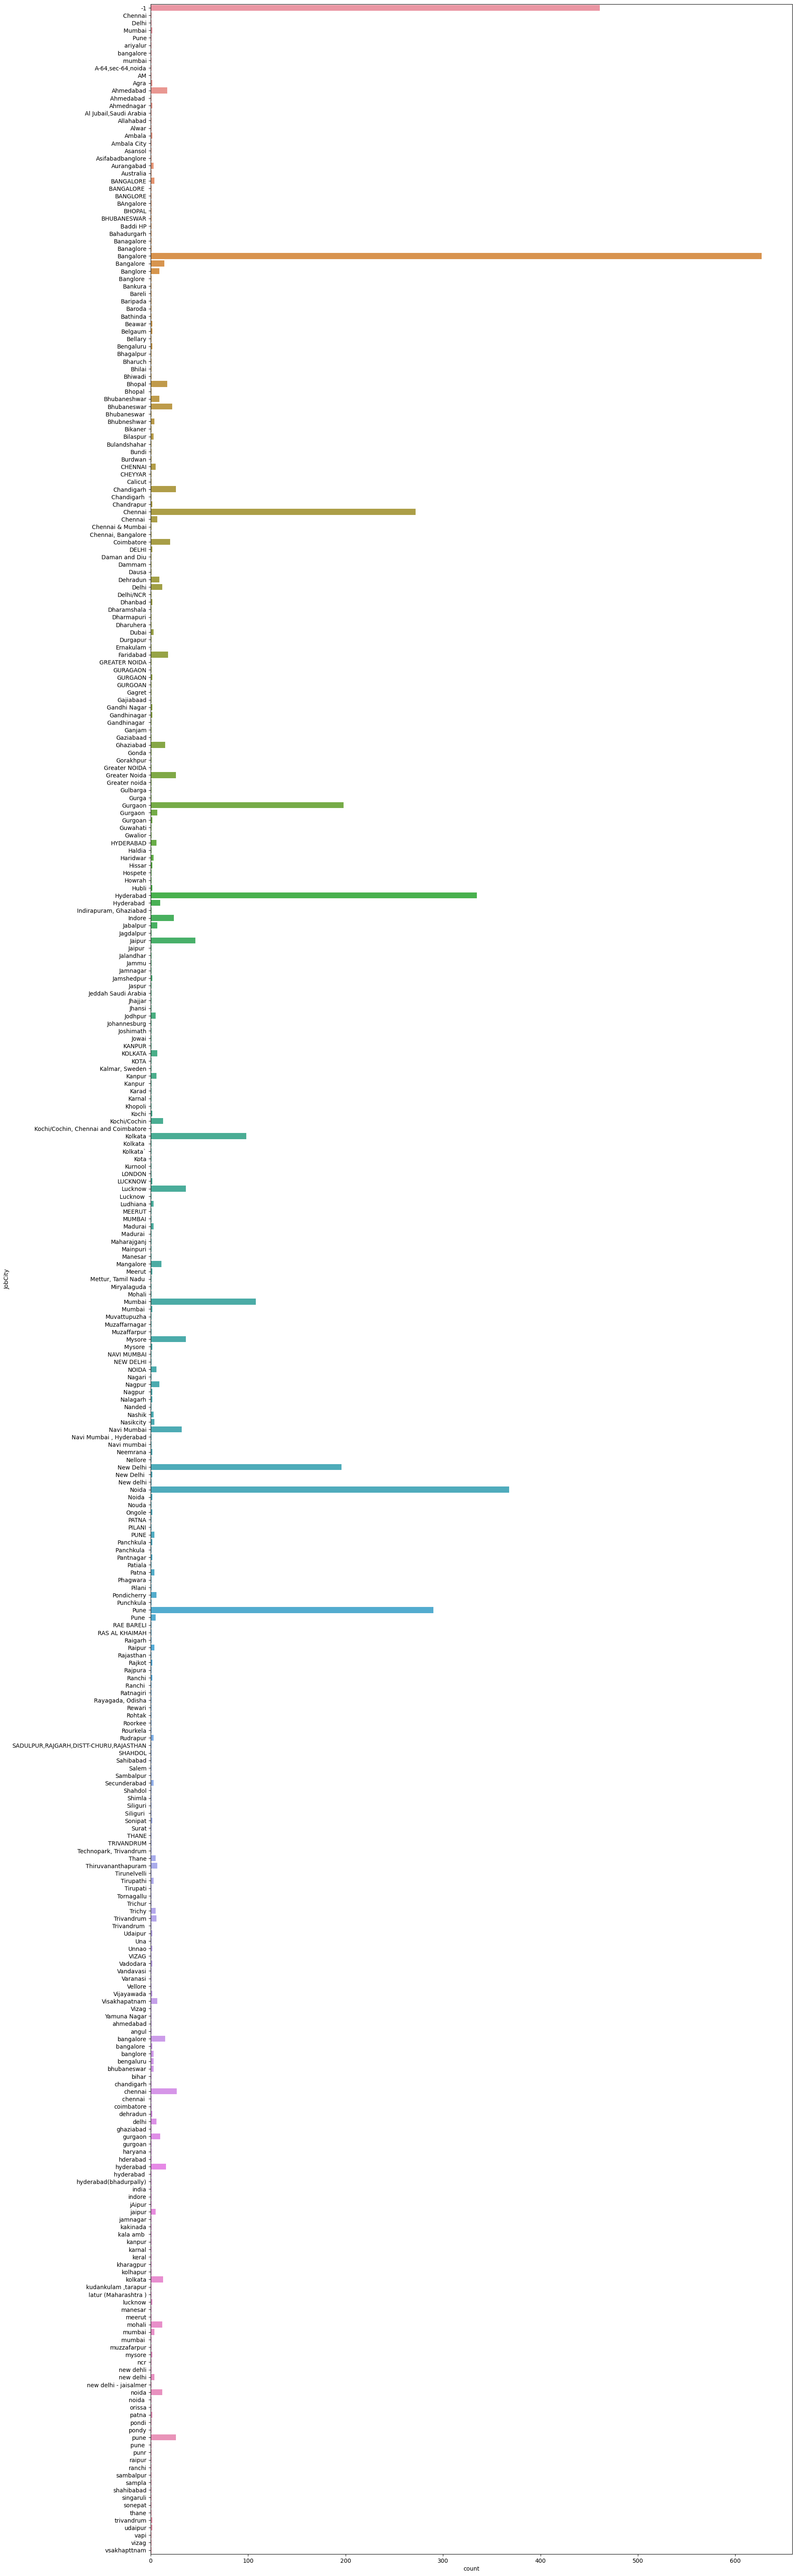

In [18]:
plt.figure(figsize=(20,80))
sns.countplot(y='JobCity',data=cate)

#### Most Jobs : Banglore

In [19]:
cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      3998 non-null   category
 1   DOL             3998 non-null   category
 2   Designation     3998 non-null   category
 3   JobCity         3998 non-null   category
 4   Gender          3998 non-null   category
 5   10board         3998 non-null   category
 6   12board         3998 non-null   category
 7   Degree          3998 non-null   category
 8   Specialization  3998 non-null   category
 9   CollegeState    3998 non-null   category
dtypes: category(10)
memory usage: 111.6 KB


In [20]:
cate['Degree'].value_counts()

Degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Degree', ylabel='count'>

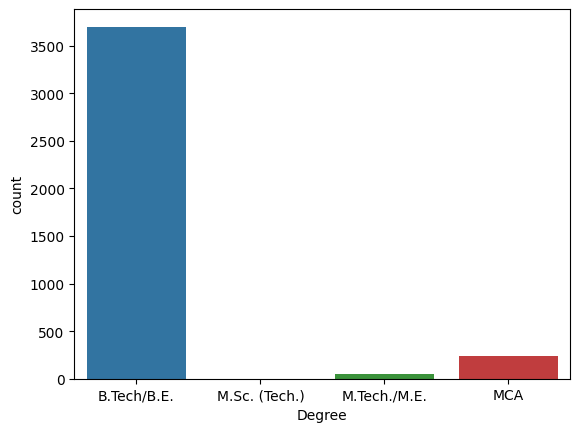

In [21]:
sns.countplot(x='Degree',data=cate)

#### Most of the students are UGs

## Bivaiate Analysis

In [22]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


<Axes: xlabel='Gender', ylabel='Salary'>

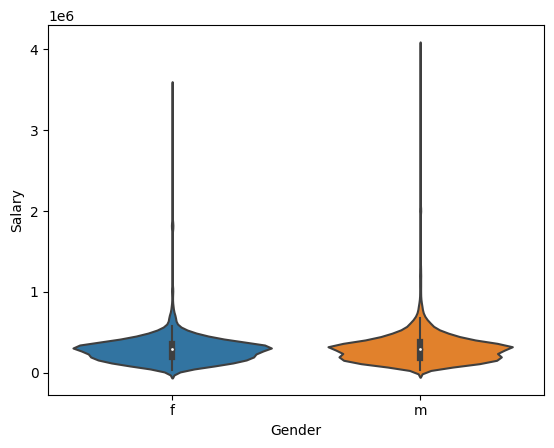

In [23]:
sns.violinplot(x=data['Gender'],y=data['Salary'])

#### Men get more salary compared to women

<Axes: xlabel='10percentage', ylabel='agreeableness'>

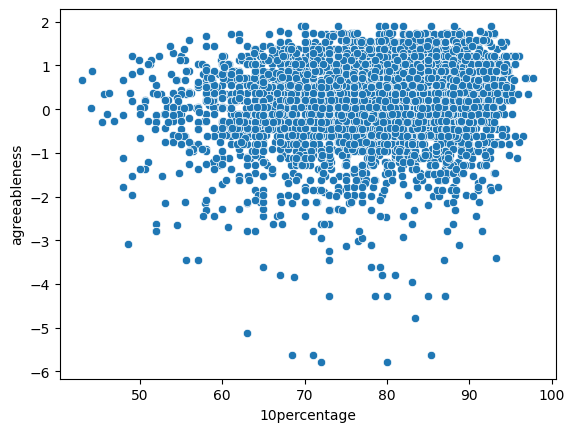

In [24]:
sns.scatterplot(x=data['10percentage'],y=data['agreeableness'])

#### Observation : There is no close linear relationship between student's 10percentage and agreeableness

In [25]:
data[data['JobCity']=='Bangalore']['Gender'].value_counts()

Gender
m    456
f    171
Name: count, dtype: int64

In [26]:
pd.crosstab(data['Gender'], data['Specialization'])

Specialization,aeronautical engineering,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,civil engineering,computer and communication engineering,computer application,...,internal combustion engine,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering
Gender,,,,,,,,,,,,,,,,,,,,,
f,1,2,0,2,9,0,1,6,0,59,...,0,0,0,10,1,0,0,0,0,1
m,2,7,5,0,6,1,8,23,1,185,...,1,1,5,191,3,2,13,1,1,5


<Axes: xlabel='CollegeTier', ylabel='Salary'>

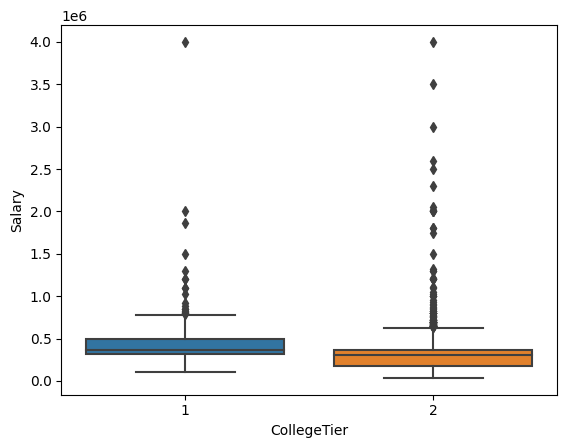

In [67]:
sns.boxplot(x=data['CollegeTier'],y=data['Salary'])

#### Observation : students passing out from tier 2 colleges has average salary slightly less than tier 1

### Question 5

####  Does the preference of Specialisation depend on the Gender? Yep girls prefer bio over boys and don't prefer Mechanical engineering others are more are less equal

In [35]:
computer = data[data['Specialization']=='computer science & engineering']

In [44]:
jobs = ['software engineer','programmer analyst','hardware engineer','associate engineer']
computer = data.loc[data['Designation'].isin(jobs)]

In [54]:
computer = computer[computer['GraduationYear']==computer['DOJ'].dt.year]

In [62]:
len(computer.loc[(computer['Salary']>=250000) & (computer['Salary']<=300000)])

59

In [63]:
len(computer)

374

### only 16% of computer science engineering graduates taking up jobs like sofatware engineer,hardware engineer,program analyst and associate engineer get salary 2.5 - 3L

## Question 7

#### Is it that students who get marks above 85% in both 10 and 12 fall in tier 1 colleges